# Label Data

In [3]:
import pandas as pd
df = pd.read_csv('blink_dataset.csv')

In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


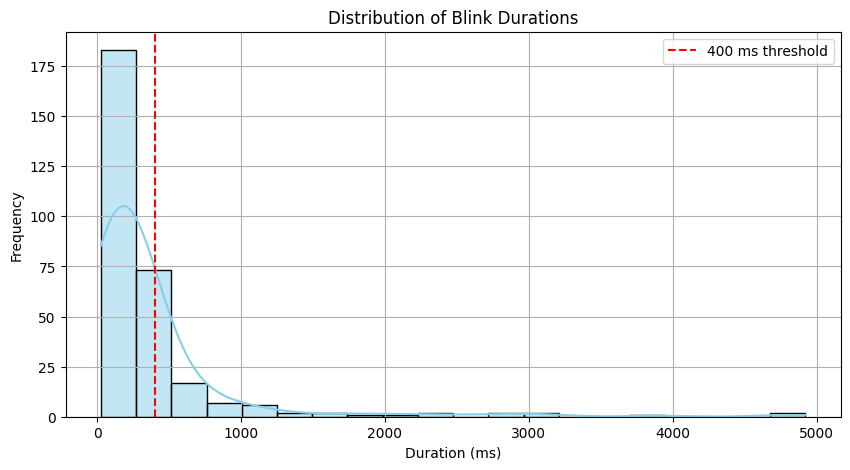

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["Duration_ms"],bins=20, kde=True,color='skyblue')
plt.axvline(400, color='red', linestyle='--', label='400 ms threshold')
plt.title('Distribution of Blink Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
THRESHOLD = 400
df['Label'] = df['Duration_ms'].apply(lambda x: '.' if x < THRESHOLD else '-')
df.to_csv('blink_labeled.csv', index=False)
print("Save successfully")

Save successfully


In [10]:
!pip install -U scikit-learn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

df= pd.read_csv('blink_labeled.csv')

# Select features and target
X = df[['Duration_ms',"EAR"]]
y = df['Label']

# Encode target labels ('.' -> 0 and '-' -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'blink_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("Model and label encoder saved successfully.")

Model and label encoder saved successfully.
